# Pymaceuticals Inc.
---

### Analysis

- There is interesting results from this data analysis.
- Pymaceutical's cancer trial on tumor size for mice indicate that Capomulin and Ramicane are the two most effective treatments of the trials for squamous cell carcinoma (SCC). This is shown as well since they have the lowest std values for these two treatments .  Also note that the distribution is equal for male and female mice , which would rule out bias based on gender . One indicator that determined overall tumor size is the weight of the mouse , so that the higher the weight , the larger the resulting tumor size. Weight seems to be a determinant factor for tumor size.

- Alessia Presotto
 

In [416]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_total = pd.merge(study_results , mouse_metadata,how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_total.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [417]:
# Checking the number of mice.
mouse_count = len(mouse_total["Mouse ID"].unique())
print(mouse_count)

249


In [418]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# code from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
mouse_total.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [419]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_total.tail(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1880,j755,45,69.563621,1,Naftisol,Male,23,27
1881,e213,45,63.105696,4,Naftisol,Male,8,27
1882,e584,45,68.359777,4,Naftisol,Male,9,27
1883,t718,45,63.423695,4,Placebo,Female,10,30
1884,o562,45,72.455421,2,Propriva,Female,4,25
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1886,v991,45,70.167749,4,Propriva,Female,10,30
1887,z795,45,65.741070,3,Naftisol,Female,13,29
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [420]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_total.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [421]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_total["Mouse ID"].unique())
print(mouse_count)

249


## Summary Statistics

In [422]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


per_mouse_average = mouse_total.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
per_mouse_median = mouse_total.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
per_mouse_std = mouse_total.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
per_mouse_sem = mouse_total.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


mouse_summary_df = pd.DataFrame({"per_mouse_average":per_mouse_average,
                   "per_mouse_median":per_mouse_median,
                   "per_mouse_std":per_mouse_std,
                   "per_mouse_sem":per_mouse_sem })

mouse_summary_df


,per_mouse_average,per_mouse_median,per_mouse_std,per_mouse_sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [423]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_agg_df = mouse_total.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median","var", "std","sem"] )

mouse_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


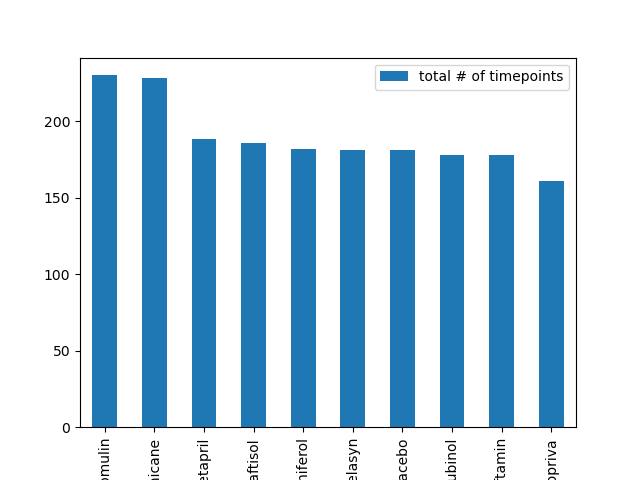

In [296]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


per_mouse = mouse_total["Drug Regimen"].value_counts()


x_axis = per_mouse.index


mouse_timepoint_df = pd.DataFrame({'Drug regimen':x_axis, 'total # of timepoints':per_mouse})
bar_graph = mouse_timepoint_df.plot.bar(x='Drug regimen', y='total # of timepoints', rot=90)



<IPython.core.display.Javascript object>


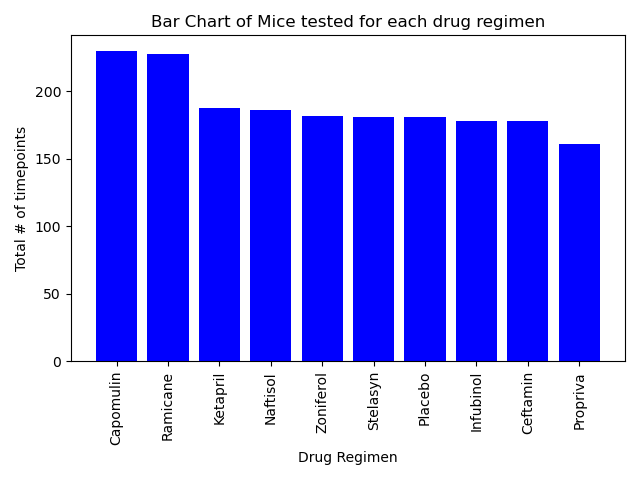

In [444]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


 

tick_locations = [value for value in x_axis]


plt.bar(x_axis, per_mouse , color='b', align='center')
plt.xticks(tick_locations , x_axis, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Total # of timepoints")
plt.title("Bar Chart of Mice tested for each drug regimen")

plt.tight_layout()

plt.show()




<IPython.core.display.Javascript object>


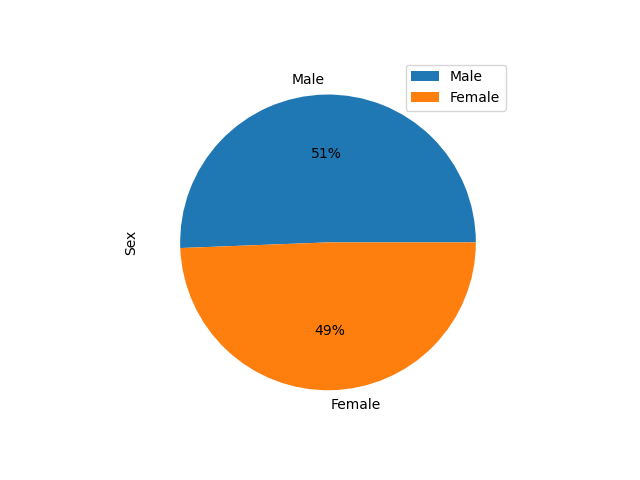

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_pie = mouse_total["Sex"].value_counts()

xs_axis = mouse_pie.index


mouse_sex_df = pd.DataFrame({'Sex':mouse_pie }, 
    index=xs_axis  )
    
    
pie_graph = mouse_sex_df.plot.pie(y='Sex', autopct='%1.0f%%')

Index(['Male', 'Female'], dtype='object')


<IPython.core.display.Javascript object>


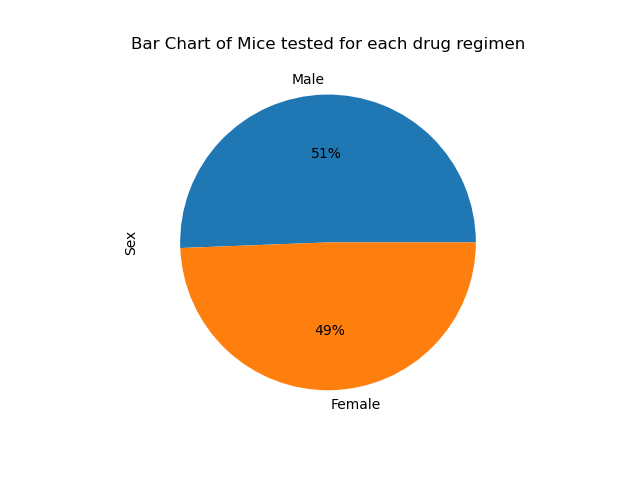

In [316]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

print(xs_axis)

plt.pie(mouse_pie, autopct='%1.0f%%', labels=xs_axis)

plt.ylabel("Sex")

plt.title("Bar Chart of Mice tested for each drug regimen")

plt.show()


## Quartiles, Outliers and Boxplots

In [497]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

ypt = mouse_total.groupby(["Mouse ID"])["Timepoint"].max()
ypt = ypt.reset_index()


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mergd_df = ypt.merge(mouse_total,on=['Mouse ID','Timepoint'], how="left")
mergd_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [506]:
# Put treatments into a list for for loop (and later for plot labels)

p_labels = [vals for vals in mergd_df]


# Create empty list to fill with tumor vol data (for plotting)

tum_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

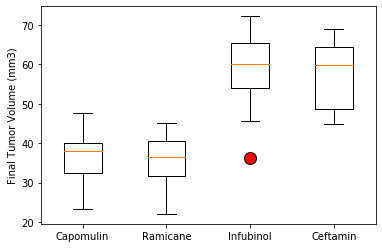

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

<IPython.core.display.Javascript object>


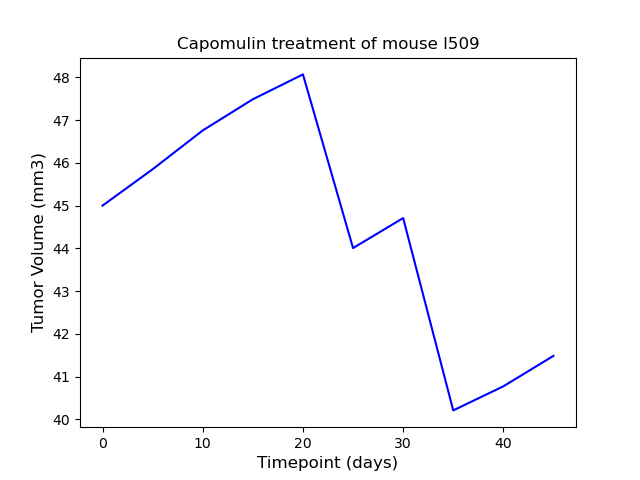

In [406]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



mouse_l509 = mouse_total[(mouse_total['Drug Regimen']=='Capomulin') & (mouse_total['Mouse ID']=='l509')]

 
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], color='blue')
plt.title('Capomulin treatment of mouse l509', fontsize=12)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.show()



<IPython.core.display.Javascript object>


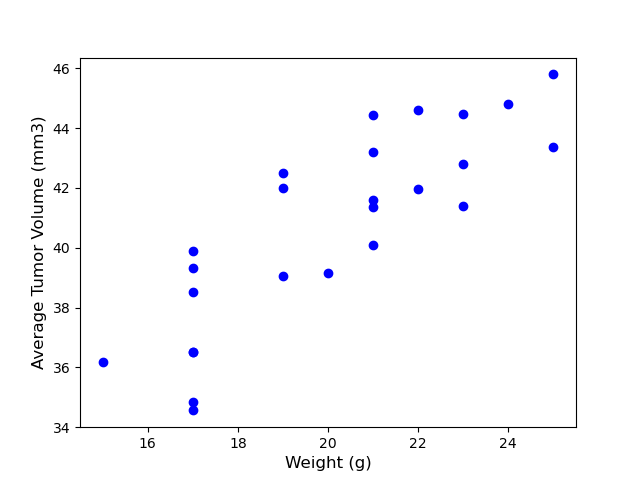

In [443]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


mouse_Cap = mouse_total[(mouse_total['Drug Regimen']=='Capomulin')] 


mouse_Cap_waverage = mouse_Cap.groupby(["Mouse ID"])["Weight (g)"].mean() 
mouse_Cap_taverage = mouse_Cap.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean() 


plt.scatter(mouse_Cap_waverage, mouse_Cap_taverage, color='blue')
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)


plt.show()


## Correlation and Regression

<IPython.core.display.Javascript object>


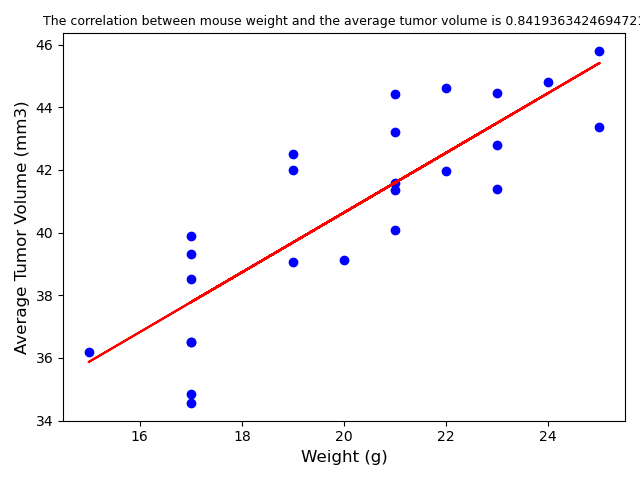

In [494]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress


plt.scatter(mouse_Cap_waverage, mouse_Cap_taverage, color='blue')
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)


(slope, intercept, rvalue, pvalue, stderrr) = linregress(mouse_Cap_waverage, mouse_Cap_taverage)


regress_values = slope * mouse_Cap_waverage + intercept

plt.plot(mouse_Cap_waverage, regress_values, color='red')


plt.title("The correlation between mouse weight and the average tumor volume is "+str(rvalue), fontsize=9)

plt.tight_layout()


plt.show()

